## Kaggle Titanic Survival predictor

#### Training a model so that we can predict the chance of survival of the victims of Titanic tragedy

In [57]:
# import the libraries

import pandas as pd
import numpy as np

In [58]:
# Read training data from data folder

training_data = pd.read_csv("./data/train.csv")
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
# Read test data from data folder

test_data = pd.read_csv("./data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [60]:
# chacking female survival rate

# Getting total data of Women from dataSet
female_data = training_data.loc[training_data.Sex == "female"]

# female_data  (This line prints total data of females)

# Getting Survival Column of data of females
female = female_data["Survived"]

# female   (This line prints survived column of female_data)

# Since survived people are denoted by 1 and dead by 0. sum() calculates all 1's and gives count of all survived females
total_female_survived = sum(female)  

# total_female_survived 

# len() calulates total number of rows in female dataset
total_female = len(female)

female_survival_rate = (total_female_survived / total_female)*100

print("% of female survived :", female_survival_rate)


% of female survived : 74.20382165605095


In [61]:
# checking male survival rate

# getting male data from dataset
male_data = training_data.loc[training_data.Sex == "male"]

# male (prints dataset of male only from total dataset)

# getting survival column of male
male = male_data["Survived"]

total_male_survived = sum(male)

total_male = len(male)

male_survival_rate = (total_male_survived / total_male) * 100;

print("% of male survived :", male_survival_rate)

% of male survived : 18.890814558058924


##### Since 80% of survivals consists of females, this can be a good parameter to train model with quite a good accuracy.

#### To increase accuracy of prediction, we can use multiple parameters.
##### To get most out multiple parameters, we can use RandomForestClassifier from sklearn library, which gives result on majority outcomes.


In [62]:
from sklearn.ensemble import RandomForestClassifier

# import RandomForestClassifer class from sklearn library

# make a model
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)



### RandomForestClassifier works on making various decision tree and giving output as most obtained value from all decision tree. 

#### n_estimators tells the number of decision tree going to be made while training model. Making this a suitably large increases the accuracy of our model but making it too large cause size problem.
#### max_depth tells the depth up to which decision tree will grow. Making it large also causes size problem. So, it should have a sufficiently large value.
#### random_state allows to choose random data sets from total data sets for training purposes. Making its value 0 will give same result over multiple time running these while > 0 causes it change data sets. lower its value more consistent the result will be.

In [63]:
# paramters on which model is going to be trained
features = ["Pclass", "Sex", "SibSp", "Parch"]

# my model will be predicting the survival rate so Y = training_data["Survived"]
Y = training_data["Survived"]

# converting all features value to numbers for model to work upon
X = pd.get_dummies(training_data[features])

# for prediction, converting those features values as numbers upon which our models have been trained.
X_test = pd.get_dummies(test_data[features])


#### pd.get_dummies() make dummy column and convert row value into unique column value with its values as 0 or 1. As for example, Sex column consists of String value i.e., male and female. but ML models work on numerical data. so pd.get_dummies(training_data.Sex) will convert it into columns name Sex_male and Sex_female.

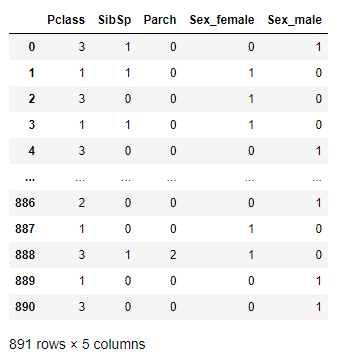

#### Here, row containing Sex as male is 1 and female as 0 in Sex_male column. Similarly, 1's and 0's are filled in Sex_female column. Other features reamained unchaged because their values are already numbers.

#### we can change the name of those dummies like for Sex_male as male only by providing hyperparameters to pd.get_dummies() method.

#### pd.get_dummies(training_data.Sex, prefix = "gen", prefix_sep = "=")
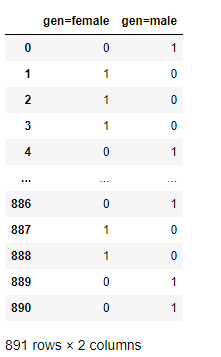

#### As for example, pd.get_dummies(training_data.Sex, prefix = None)
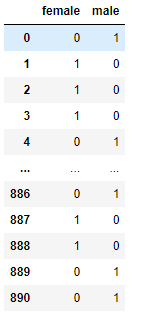

In [64]:
# Training of Model
model.fit(X, Y)

# making predictions

prediction = model.predict(X_test)

# converting the predictions into DataFrame

output = pd.DataFrame({"passengerID" : test_data.PassengerId, "Name" : test_data.Name, "Survival" : prediction})

# Storing the predictions in another csv file
output.to_csv("./data/Predictions.csv", index = False)

print("Output Stored Successfully !!!")

Output Stored Successfully !!!


#### output.to_csv(). index = True adds index to the csv file while index = False don't make index column.